In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data :

### MNIST

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### JAFFE

In [3]:
jaffe_X = pd.read_csv("jaffeX.csv",delimiter=";")
jaffe_y = pd.read_csv("jaffeY.csv",delimiter=";")

In [4]:
jaffe_y = pd.get_dummies(jaffe_y.values.reshape([jaffe_y.shape[1]])).values +0.
jaffe_X = jaffe_X.values/255

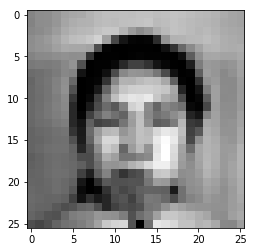

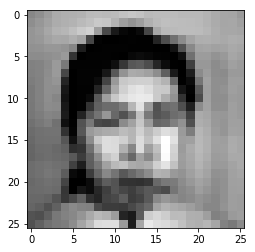

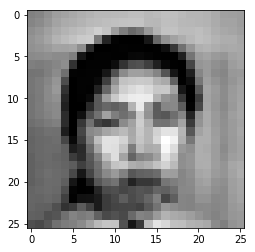

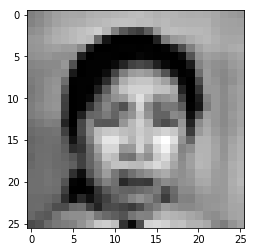

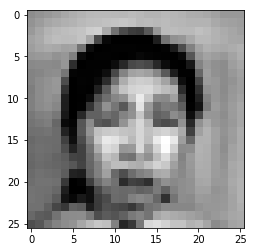

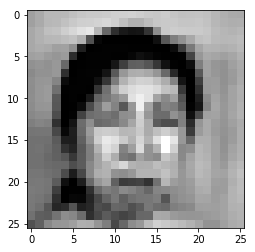

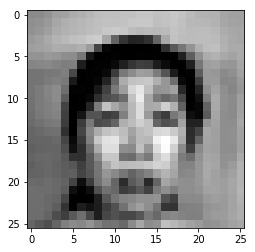

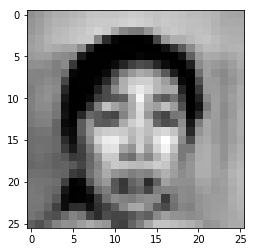

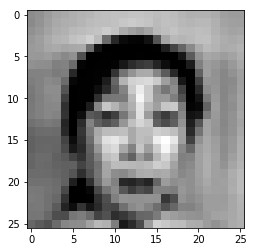

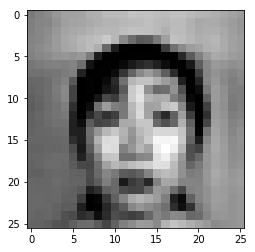

In [5]:
# Affichage d'un exemple d'image

for i in range(10):

    img = jaffe_X[i].reshape([26,26])
    plt.imshow(img.transpose(),cmap="gray")
    plt.show()

In [6]:
# RANDOM SPLIT JAFFE DATASET

X_train, X_test, y_train, y_test = train_test_split( jaffe_X, jaffe_y, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  159
Number of samples in test set :  54


# Neural network with Random initialisation

In [206]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 676])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

# NORMAL DISTRIBUTION
#initializer = tf.random_normal_initializer()

# ZEROS INITIALIZER
#initializer = tf.zeros


W1 = tf.Variable(initializer([676,100]))
b1 = tf.Variable(initializer([100]))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(initializer([100,50]))
b2 = tf.Variable(initializer([50]))

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

W3 = tf.Variable(initializer([50,10]))
b3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

epoch :  0 / 1000
accuracy :  0.12962963
loss :  3.736294

epoch :  10 / 1000
accuracy :  0.074074075
loss :  3.2538042

epoch :  20 / 1000
accuracy :  0.074074075
loss :  3.2356498

epoch :  30 / 1000
accuracy :  0.074074075
loss :  3.2286615

epoch :  40 / 1000
accuracy :  0.074074075
loss :  3.2216191

epoch :  50 / 1000
accuracy :  0.11111111
loss :  3.2143526

epoch :  60 / 1000
accuracy :  0.12962963
loss :  3.2067828

epoch :  70 / 1000
accuracy :  0.12962963
loss :  3.1988287

epoch :  80 / 1000
accuracy :  0.12962963
loss :  3.1904032

epoch :  90 / 1000
accuracy :  0.14814815
loss :  3.181412

epoch :  100 / 1000
accuracy :  0.2037037
loss :  3.171751

epoch :  110 / 1000
accuracy :  0.24074075
loss :  3.1613054

epoch :  120 / 1000
accuracy :  0.25925925
loss :  3.1499422

epoch :  130 / 1000
accuracy :  0.2962963
loss :  3.13751

epoch :  140 / 1000
accuracy :  0.2962963
loss :  3.123834

epoch :  150 / 1000
accuracy :  0.2962963
loss :  3.1087081

epoch :  160 / 1000
accur

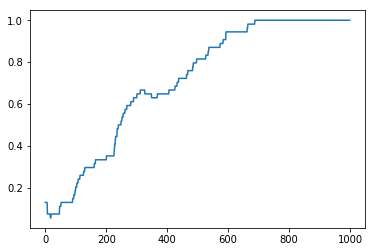

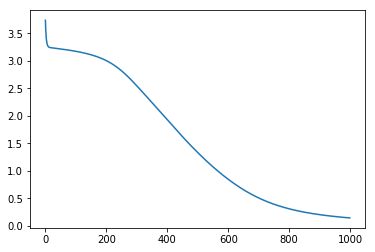

In [207]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch)
        print("accuracy : " , ac)
        print("loss : ",l )
        print()
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()

In [161]:
sess.close()